This notebook will attempt to find the best neighborhood in Pittsburgh by using the water.tsv data set found at https://data.wprdc.org/dataset/. To measure this, we will look at the amount of water features per neighborhood, 

In [2]:
import pandas as pd

waterSet = pd.read_csv("water.tsv", sep="\t")
waterSet.head()

,_id,id,name,control_type,feature_type,inactive,make,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,1816791851,Able Long Park,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Beechview,4,19,42003192000,5,19,6,4-28,40.408440,-80.028330
1,2,1599892422,Albert Turk Graham Park,On/Off,Drinking Fountain,f,Most Dependable,https://tools.wprdc.org/images/pittsburgh/wate...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440453,-79.984064
2,3,1422043278,Allegheny Commons Arch St,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454390,-80.008281
3,4,1237191582,Allegheny Commons East Tennis Courts,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.450874,-80.001962
4,5,1146184773,Allegheny Commons Pool,Continuous,Drinking Fountain,f,Regular Fountain,https://tools.wprdc.org/images/pittsburgh/wate...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.451003,-80.001502


In [3]:
waterSet['neighborhood'].value_counts().sort_values(ascending=False)

Squirrel Hill South    14
Highland Park          12
Bloomfield              8
Allegheny Center        8
Terrace Village         8
                       ..
Middle Hill             1
Homewood South          1
Bluff                   1
Fineview                1
Spring Garden           1
Name: neighborhood, Length: 66, dtype: int64

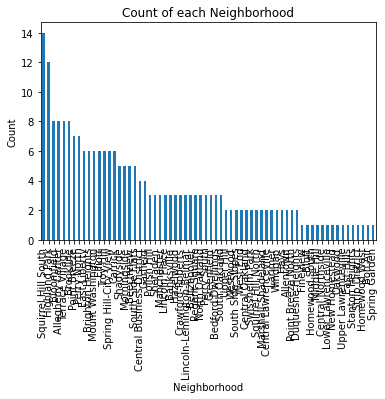

In [4]:
#Show Table of all water features per neighborhood

# Assuming 'duckWater' is your DataFrame
neighborhood_counts = waterSet['neighborhood'].value_counts()

# Create a bar plot using .plot
neighborhood_counts.plot(kind='bar', xlabel='Neighborhood', ylabel='Count', title='Count of each Neighborhood')

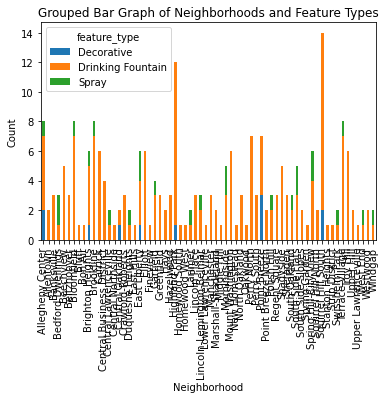

In [5]:
#Split into grouped bargraph per neighborhood

grouped_data = waterSet.groupby(['neighborhood', 'feature_type']).size().unstack(fill_value=0)
# Group by both 'neighborhood' and 'feature_type', and get the count for each group
grouped_data = waterSet.groupby(['neighborhood', 'feature_type']).size().unstack(fill_value=0)

# Create a stacked grouped bar plot
grouped_data.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Grouped Bar Graph of Neighborhoods and Feature Types')


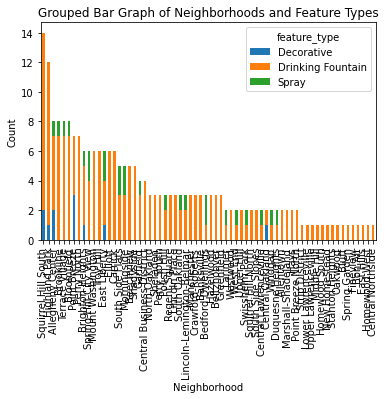

In [6]:
#Sort the plot in descending order


total_count = grouped_data.sum(axis=1)

# Sort the neighborhoods based on the total count in descending order
sorted_neighborhoods = total_count.sort_values(ascending=False).index

# Reorder the DataFrame
grouped_data = grouped_data.loc[sorted_neighborhoods]

# Sort the bars within each neighborhood by the count of feature types
grouped_data = grouped_data.apply(lambda x: x.sort_values(ascending=False), axis=1)

#Create graph
grouped_data.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Grouped Bar Graph of Neighborhoods and Feature Types')


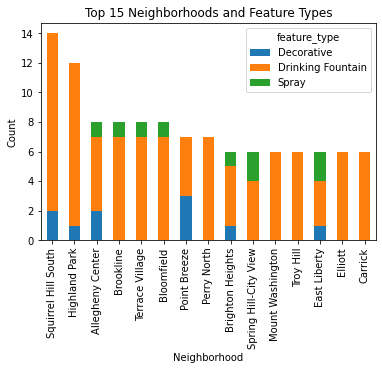

In [7]:
#Show the top 15 neighborhoods
top15 = grouped_data.head(15)
top15.plot(kind='bar', stacked=True, xlabel='Neighborhood', ylabel='Count', title='Top 15 Neighborhoods and Feature Types')

This notebook helps to measure the best neighborhood in Pittsburgh, which is decided by how duck friendly the neighborhood is. Seeing as ducks love water, this notebook uses a data set to create a graph of water feature quantities per neighborhood. The graph also uses different colors to display the different types of water features, which are decorative, drinking fountain, and spray. Looking at the final graph, it is clear that Squirrell Hill South has the most total water features, coming in with 12 Drinking Fountains and 2 Decorative water features. 